# Heritage sites

## UNESCO Sites in Ireland

<https://www.isde.ie/geonetwork/srv/eng/catalog.search#/metadata/69df8904-53df-4e1e-bddf-ab725a4060d4>

In [1]:
import os
from datetime import datetime, timezone
from zipfile import ZipFile

import contextily as cx
import geopandas as gpd
import matplotlib.pyplot as plt
import pooch

In [6]:
# base data download directory
DATA_DIR = os.path.join("data", "heritage")
os.makedirs(DATA_DIR, exist_ok=True)

URL = (
    "https://www.heritagecouncil.ie/content/files/"
    "UNESCO-Sites-in-Ireland-Shapefiles.zip"
)
KNOWN_HASH = None
FILE_NAME = "UNESCO-Sites-in-Ireland-Shapefiles.zip"

DATA_FILE = os.path.join(DATA_DIR, FILE_NAME)

# basemap cache directory
cx.set_cache_dir(os.path.join("data", "basemaps"))

In [7]:
# download data if necessary
if not os.path.isfile(DATA_FILE):
    pooch.retrieve(
        url=URL,
        known_hash=KNOWN_HASH,
        fname=FILE_NAME,
        path=DATA_DIR
    )

    with open(f"{DATA_FILE[:-15]}.txt", "w", encoding="utf-8") as outfile:
        outfile.write(
            f"Data downloaded on: {datetime.now(tz=timezone.utc)}\n"
            f"Download URL: {URL}"
        )

SHA256 hash of downloaded file: de7f350f8f8e2f73c2d8dbd6663443197a2063797522875fd27a291d018a43bb
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


In [9]:
with open(f"{DATA_FILE[:-15]}.txt") as f:
    print(f.read())

Data downloaded on: 2023-10-29 12:57:32.327819+00:00
Download URL: https://www.heritagecouncil.ie/content/files/UNESCO-Sites-in-Ireland-Shapefiles.zip


In [10]:
ZipFile(DATA_FILE).namelist()

['UNESCO Sites in Ireland Shapefiles/UNESCO_Sites.cpg',
 'UNESCO Sites in Ireland Shapefiles/UNESCO_Sites.dbf',
 'UNESCO Sites in Ireland Shapefiles/UNESCO_Sites.prj',
 'UNESCO Sites in Ireland Shapefiles/UNESCO_Sites.sbn',
 'UNESCO Sites in Ireland Shapefiles/UNESCO_Sites.sbx',
 'UNESCO Sites in Ireland Shapefiles/UNESCO_Sites.shp',
 'UNESCO Sites in Ireland Shapefiles/UNESCO_Sites.shp.xml',
 'UNESCO Sites in Ireland Shapefiles/UNESCO_Sites.shx']

In [23]:
data = gpd.read_file(
    os.path.join(
        f"zip://{DATA_FILE}!" +
        [x for x in ZipFile(DATA_FILE).namelist() if x.endswith(".shp")][0]
    )
)

In [24]:
data

,Title,Address,County,Blurb,X_Co_ord,Y_Co_ord,Phone_Numb,Email_Addr,Website,Further_In,Image,geometry
0,Brú na Bóinne World Heritage Site,Donore,Meath,"Brú na Bóinne, which means the ‘palace’ or the...",702620,772760,Phone: 00353 (0)41 9880300 Fax: 00353 (0)41 98...,brunaboinne@opw.ie,http://www.heritageireland.ie/en/midlandseastc...,http://www.worldheritageireland.ie/bru-na-boinne/,A,POINT (702620.000 772760.000)
1,Burren and Cliffs of Moher Geopark,Doolin,Clare,Just to the north of the Cliffs of Moher you w...,504050,692100,Phone: 00353 (0)65 7072295 or 00353 (0)65 7086141,info@burren.ie or info@cliffsofmoher.ie,http://www.burrengeopark.ie/,http://www.cliffsofmoher.ie/,B,POINT (504050.000 692100.000)
2,The Copper Coast Geopark,Bunmahon,Waterford,The Copper Coast is a stretch of the southern ...,643940,599030,Phone: 00353 (0)51 292828,info@coppercoastgeopark.com,http://www.coppercoastgeopark.com/,http://www.discoverireland.ie/Arts-Culture-Her...,C,POINT (643940.000 599030.000)
3,The Giant's Causeway World Heritage Site,Bushmills,Antrim,Flanked by the wild North Atlantic Ocean and a...,694900,944460,Phone: 0044 (0)28 20731855,giantscauseway@nationaltrust.org.uk,http://www.nationaltrust.org.uk/giants-causeway,http://www.giantscausewayofficialguide.com/ind...,D,POINT (694900.000 944460.000)
4,Marble Arch Caves Global Geopark,Blacklion/Enniskillen,Cavan/Fermanagh,The Marble Arch Caves Global Geopark contains ...,612770,835700,Phone: 0044 (0)28 66348855,info@marblearchcavesgeopark.com,http://www.marblearchcavesgeopark.com/,http://discoverbelturbet.ie/unesco-geopark/mar...,E,POINT (612770.000 835700.000)
5,Skellig Michael World Heritage Site,off Iveragh Peninsula,Kerry,"The Skellig Rocks, Skellig Michael (also known...",424800,560800,Phone: 00353 (0)1 6476000,info@heritageireland.ie,http://www.heritageireland.ie/en/south-west/sk...,http://www.worldheritageireland.ie/skellig-mic...,F,POINT (424800.000 560800.000)
6,Dublin - City of Literature,138-144 Pearse St.,Dublin 2,Dublin was designated the 4th UNESCO City of L...,716838,733990,Phone: 00353 (0)1 6744862,cityofliterature@dublincity.ie,http://www.dublincityofliterature.ie/,http://en.unesco.org/creative-cities/home,G,POINT (716838.000 733990.000)
7,Dublin Bay Biosphere,Dublin City Civic Offices,Dublin 8,"In 1981, UNESCO recognised the importance of D...",715160,734150,Phone: 00353 (0)1 2223394,biosphere@dublincity.ie,http://www.dublinbaybiosphere.ie/,http://www.unesco.org/new/en/natural-sciences/...,H,POINT (715160.000 734150.000)
8,Killarney National Park Biosphere,Killarney,Kerry,South and west of the town of Killarney in Co....,497400,587000,Phone: 00353 (64) 6631440,killarneynationalpark@duchas.ie,http://www.killarneynationalpark.ie/,http://www.unesco.org/new/en/natural-sciences/...,I,POINT (497400.000 587000.000)


In [25]:
data.shape

(9, 12)

In [27]:
data.crs

<Projected CRS: EPSG:2157>
Name: IRENET95 / Irish Transverse Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore. United Kingdom (UK) - Northern Ireland (Ulster) - onshore.
- bounds: (-10.56, 51.39, -5.34, 55.43)
Coordinate Operation:
- name: Irish Transverse Mercator
- method: Transverse Mercator
Datum: IRENET95
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

/run/media/nms/Backup/Documents/Git/hydrogen-salt-storage-optimisation/.venv/lib/python3.11/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


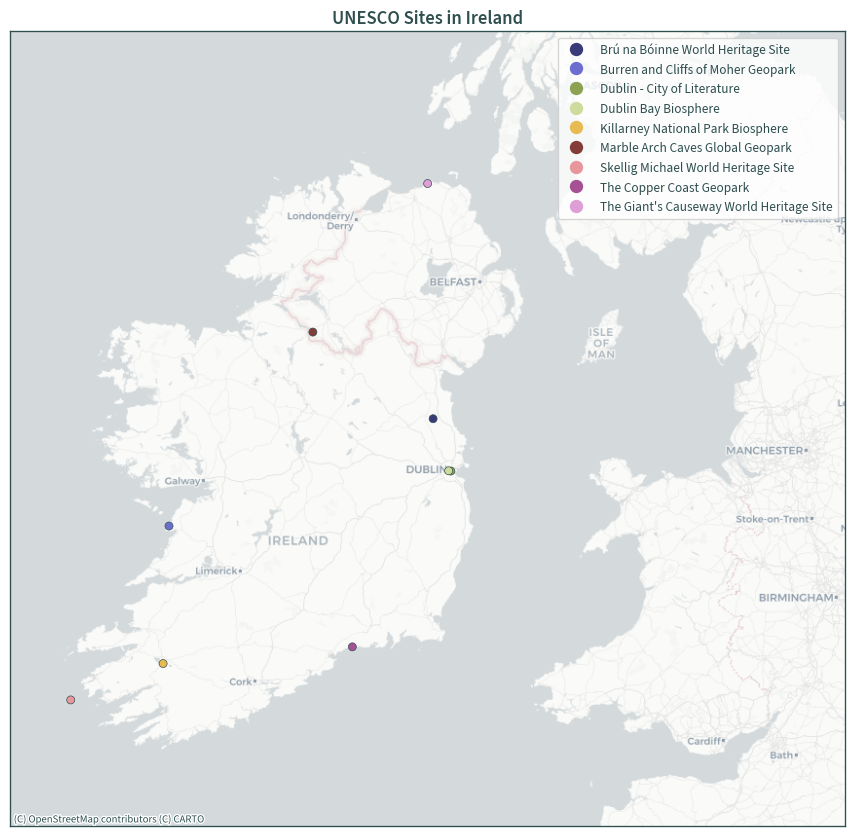

In [38]:
ax = data.to_crs(3857).plot(
    column="Title", legend=True, cmap="tab20b", figsize=(9, 9),
    legend_kwds={"loc": "upper right"}, linewidth=.5, edgecolor="darkslategrey"
)
plt.xlim(-1.25e6, -0.2e6)
plt.ylim(6.6e6, 7.6e6)
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, zoom=7)

plt.title("UNESCO Sites in Ireland")

plt.tick_params(labelbottom=False, labelleft=False)
plt.tight_layout()
plt.show()

## UNESCO Global Geoparks and Biospheres

<https://data.gov.ie/dataset/unesco-global-geoparks-and-biospheres>

In [39]:
URL = (
    "https://data-housinggovie.opendata.arcgis.com/datasets/"
    "housinggovie::unesco-global-geoparks-and-biospheres.zip?"
    "outSR=%7B%22latestWkid%22%3A3857%2C%22wkid%22%3A102100%7D"
)
FILE_NAME = "unesco-global-geoparks-and-biospheres.zip"
DATA_FILE = os.path.join(DATA_DIR, FILE_NAME)

In [40]:
# download data if necessary
if not os.path.isfile(DATA_FILE):
    pooch.retrieve(
        url=URL,
        known_hash=KNOWN_HASH,
        fname=FILE_NAME,
        path=DATA_DIR
    )

    with open(f"{DATA_FILE[:-4]}.txt", "w", encoding="utf-8") as outfile:
        outfile.write(
            f"Data downloaded on: {datetime.now(tz=timezone.utc)}\n"
            f"Download URL: {URL}"
        )

SHA256 hash of downloaded file: d5bb0ab23f1fa58d02f34906d040a5862efc09ade0d4f4ba3d1b887f1b494d3e
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


In [41]:
with open(f"{DATA_FILE[:-4]}.txt") as f:
    print(f.read())

Data downloaded on: 2023-10-29 13:43:57.548256+00:00
Download URL: https://data-housinggovie.opendata.arcgis.com/datasets/housinggovie::unesco-global-geoparks-and-biospheres.zip?outSR=%7B%22latestWkid%22%3A3857%2C%22wkid%22%3A102100%7D


In [42]:
ZipFile(DATA_FILE).namelist()

['Heritage_Assets.shp',
 'Heritage_Assets.shx',
 'Heritage_Assets.dbf',
 'Heritage_Assets.cpg',
 'Heritage_Assets.prj',
 'Heritage_Assets.xml']

In [43]:
data2 = gpd.read_file(
    os.path.join(
        f"zip://{DATA_FILE}!" +
        [x for x in ZipFile(DATA_FILE).namelist() if x.endswith(".shp")][0]
    )
)

In [44]:
data2

,Name,Last_Updat,Policy01_N,Owning_Org,Metadata_L,Policy01_C,Policy01_P,NMPF_Chapt,NMPF_Cha_1,Map_name,Map_Featur,Map_Data_S,OBJECTID,MI_Map_num,Shape__Are,Shape__Len,geometry
0,Dublin Bay Biosphere,2021,Heritage Assets Policy 1,Clare County Council: Burren and Cliffs of Moh...,http://www.isde.ie/geonetwork/srv/eng/catalog....,HEA1,P,7.3,Heritage Assets,The Wild Atlantic Way and Coastal UNESCO Herit...,UNESCO Global Geoparks and Biospheres,UNESCO_Geoparks_Biospheres,1,9,8.544442e+08,174494.258757,"MULTIPOLYGON (((-694157.454 7043788.499, -6943..."
1,Copper Coast UNESCO Geopark,2021,Heritage Assets Policy 1,Clare County Council: Burren and Cliffs of Moh...,http://www.isde.ie/geonetwork/srv/eng/catalog....,HEA1,P,7.3,Heritage Assets,The Wild Atlantic Way and Coastal UNESCO Herit...,UNESCO Global Geoparks and Biospheres,UNESCO_Geoparks_Biospheres,2,9,2.433211e+08,98507.745747,"POLYGON ((-801209.067 6834181.165, -801221.129..."
2,Burren and Cliffs of Moher UNESCO Geopark,2021,Heritage Assets Policy 1,Clare County Council: Burren and Cliffs of Moh...,http://www.isde.ie/geonetwork/srv/eng/catalog....,HEA1,P,7.3,Heritage Assets,The Wild Atlantic Way and Coastal UNESCO Herit...,UNESCO Global Geoparks and Biospheres,UNESCO_Geoparks_Biospheres,3,9,1.452018e+09,277066.411154,"MULTIPOLYGON (((-1014763.421 7009235.836, -101..."


In [45]:
data2.shape

(3, 17)

In [46]:
data2.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

/run/media/nms/Backup/Documents/Git/hydrogen-salt-storage-optimisation/.venv/lib/python3.11/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


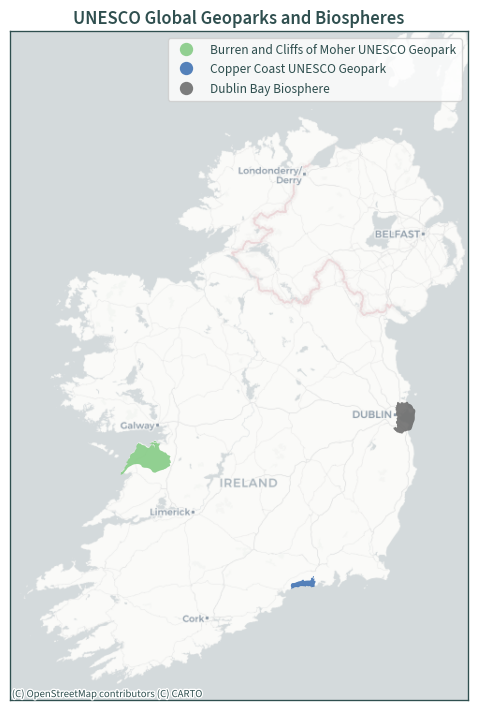

In [62]:
ax = data2.to_crs(3857).plot(
    figsize=(7.5, 7.5), column="Name", legend=True, cmap="Accent", alpha=.85
)
plt.xlim(-1.2e6, -0.6e6)
plt.ylim(6.675e6, 7.55e6)
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, zoom=7)
plt.title("UNESCO Global Geoparks and Biospheres")

plt.tick_params(labelbottom=False, labelleft=False)
plt.tight_layout()
plt.show()